In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset=pd.read_csv('Cali_housing.csv')

In [13]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# the target variable is the median_house_value

In [16]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
data=dataset.copy()

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
train=X_train.join(y_train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14303 entries, 19566 to 15948
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14303 non-null  float64
 1   latitude            14303 non-null  float64
 2   housing_median_age  14303 non-null  float64
 3   total_rooms         14303 non-null  float64
 4   total_bedrooms      14303 non-null  float64
 5   population          14303 non-null  float64
 6   households          14303 non-null  float64
 7   median_income       14303 non-null  float64
 8   ocean_proximity     14303 non-null  object 
 9   median_house_value  14303 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [39]:
trained=train.drop(['ocean_proximity'],axis=1)

In [40]:
trained.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924061,-0.101712,0.041235,0.066980,0.093293,0.054006,-0.020262,-0.042639
latitude,-0.924061,1.000000,0.004367,-0.035503,-0.067419,-0.105470,-0.072381,-0.074513,-0.146714
housing_median_age,-0.101712,0.004367,1.000000,-0.361118,-0.319476,-0.290302,-0.302544,-0.121626,0.105774
total_rooms,0.041235,-0.035503,-0.361118,1.000000,0.929986,0.850458,0.917135,0.199255,0.134482
total_bedrooms,0.066980,-0.067419,-0.319476,0.929986,1.000000,0.871818,0.978995,-0.006240,0.050707
population,0.093293,-0.105470,-0.290302,0.850458,0.871818,1.000000,0.902137,0.004546,-0.025013
households,0.054006,-0.072381,-0.302544,0.917135,0.978995,0.902137,1.000000,0.014954,0.065261
median_income,-0.020262,-0.074513,-0.121626,0.199255,-0.006240,0.004546,0.014954,1.000000,0.687596
median_house_value,-0.042639,-0.146714,0.105774,0.134482,0.050707,-0.025013,0.065261,0.687596,1.000000


<Axes: >

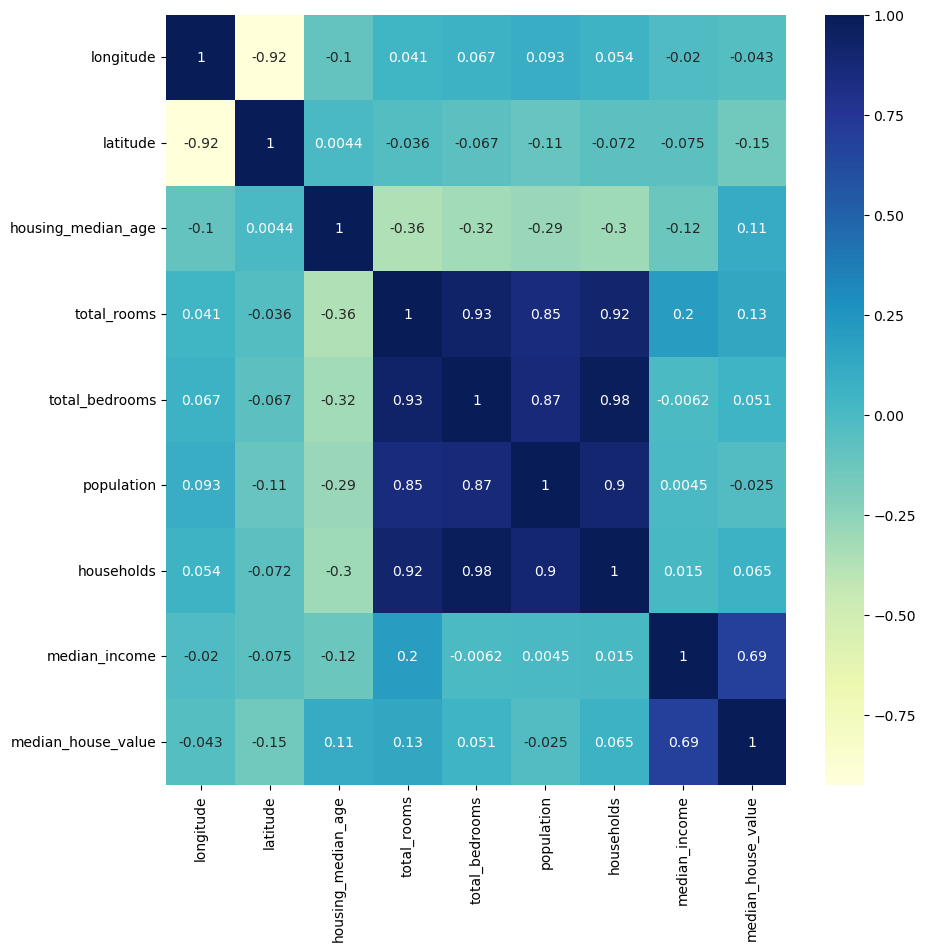

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(trained.corr(),cmap="YlGnBu",annot=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

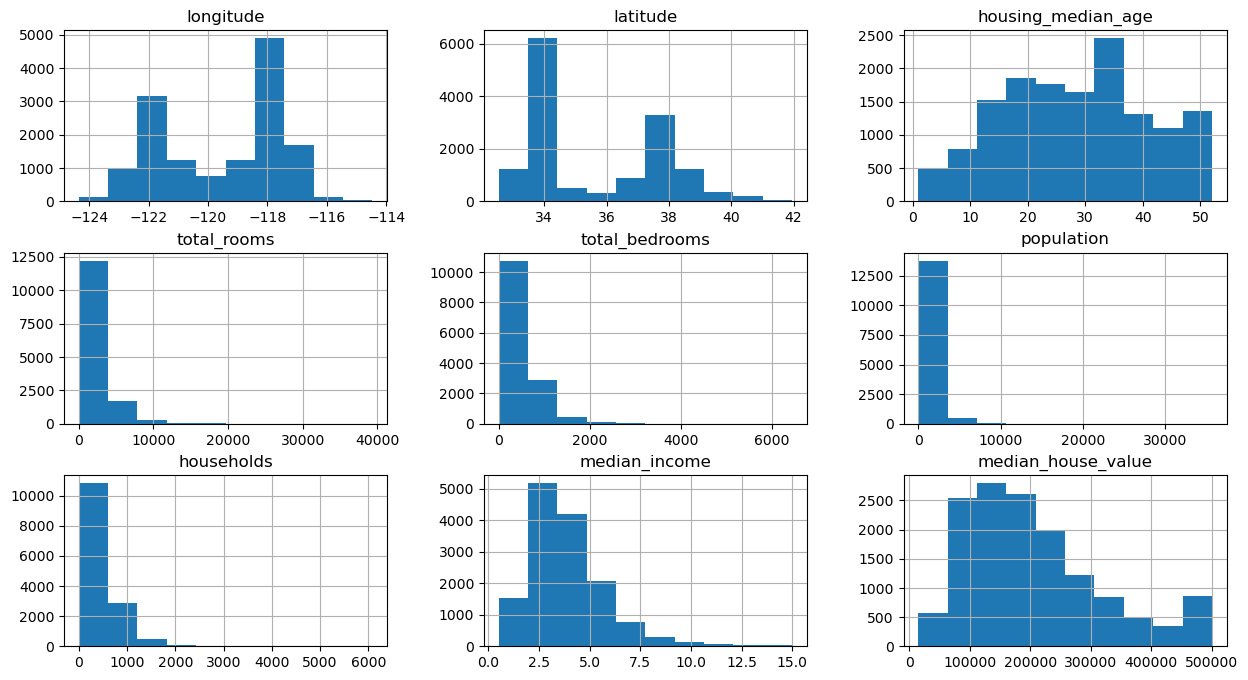

In [45]:
train.hist(figsize=(15,8))

In [46]:
train['total_rooms']=np.log(train['total_rooms']+1)
train['total_bedrooms']=np.log(train['total_bedrooms']+1)
train['population']=np.log(train['population']+1)
train['households']=np.log(train['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

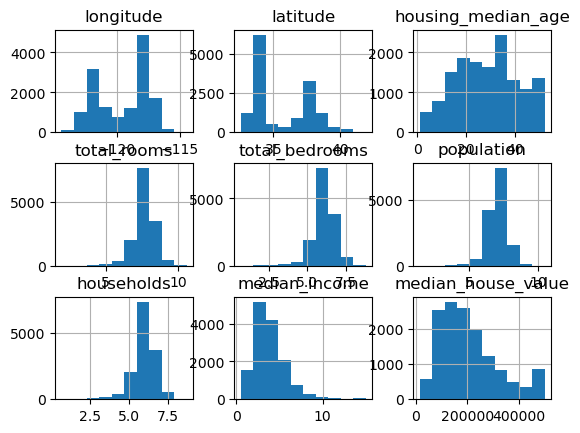

In [47]:
train.hist()

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
train.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6373
INLAND        4477
NEAR OCEAN    1834
NEAR BAY      1617
ISLAND           2
Name: count, dtype: int64

In [58]:
train = train.join(pd.get_dummies(train.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [59]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

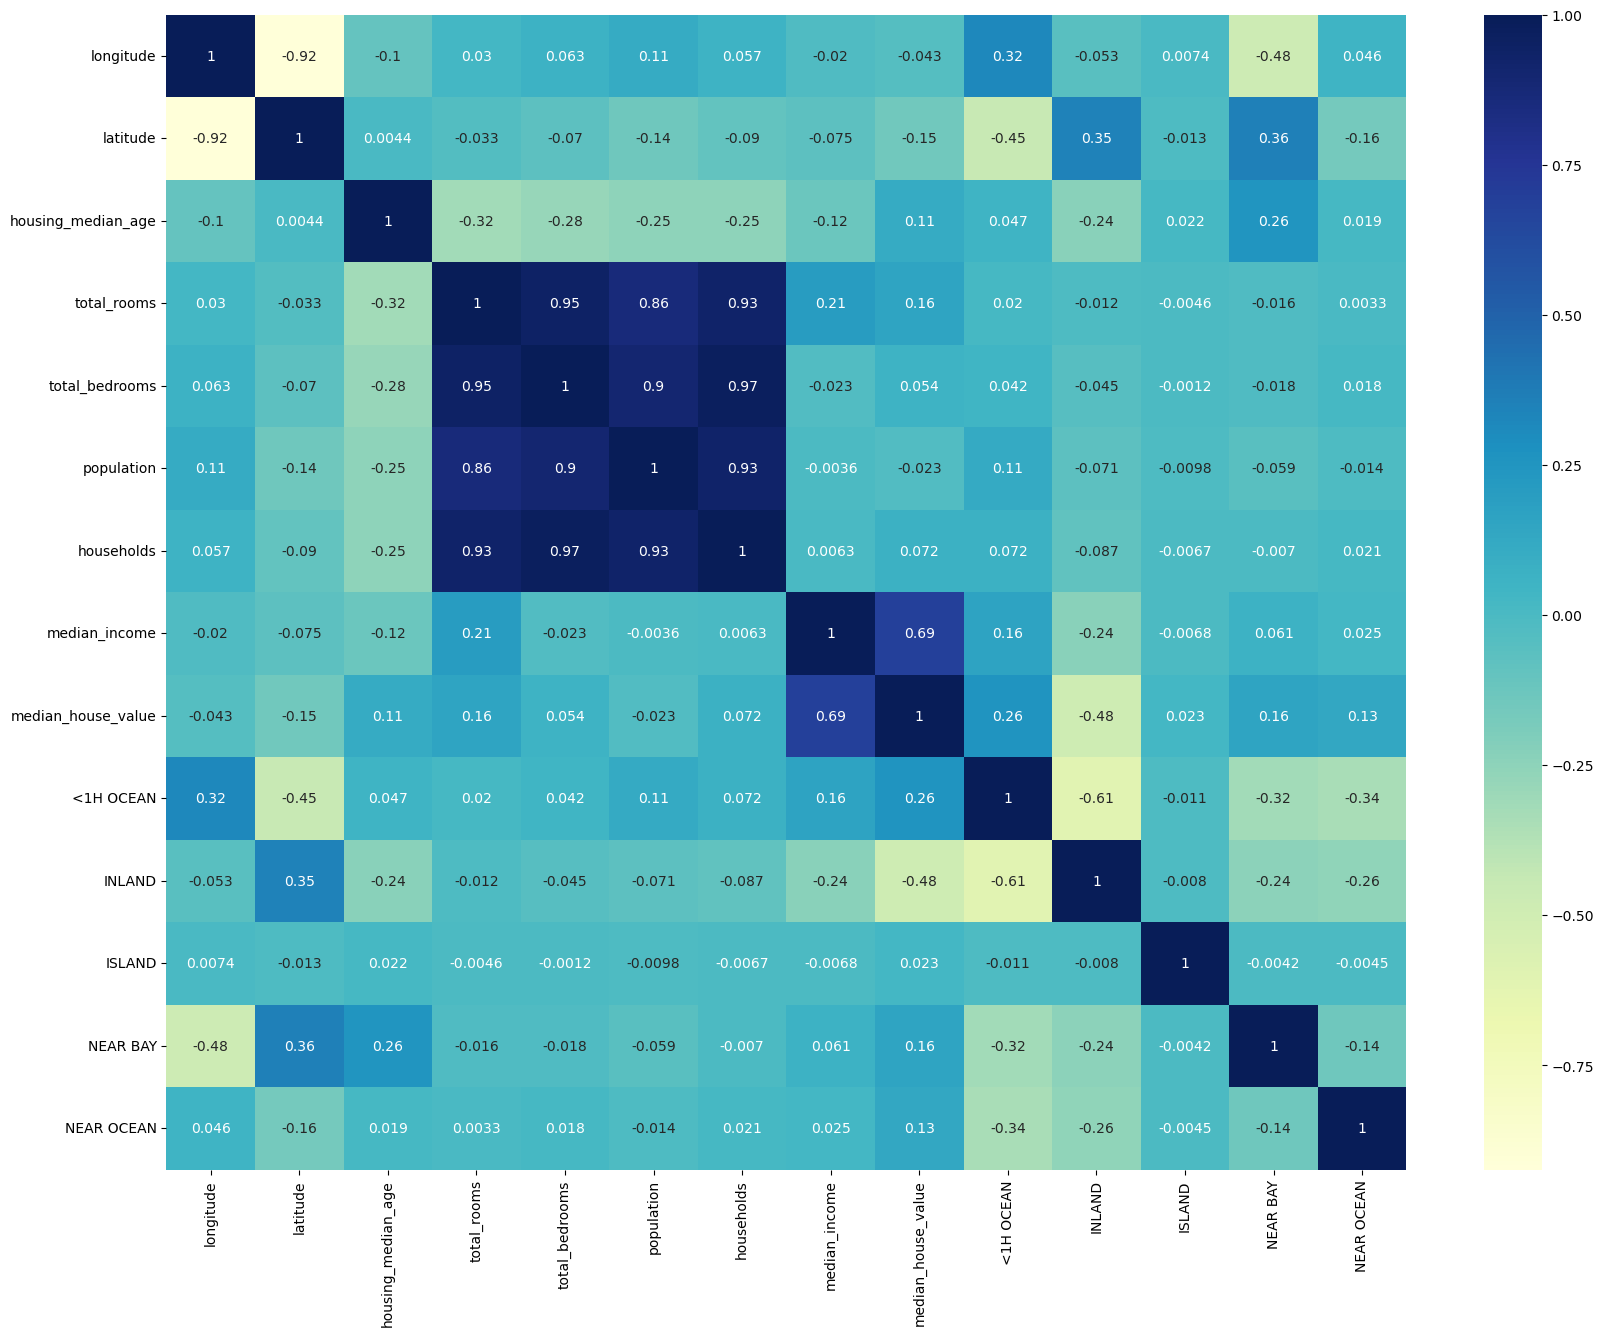

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

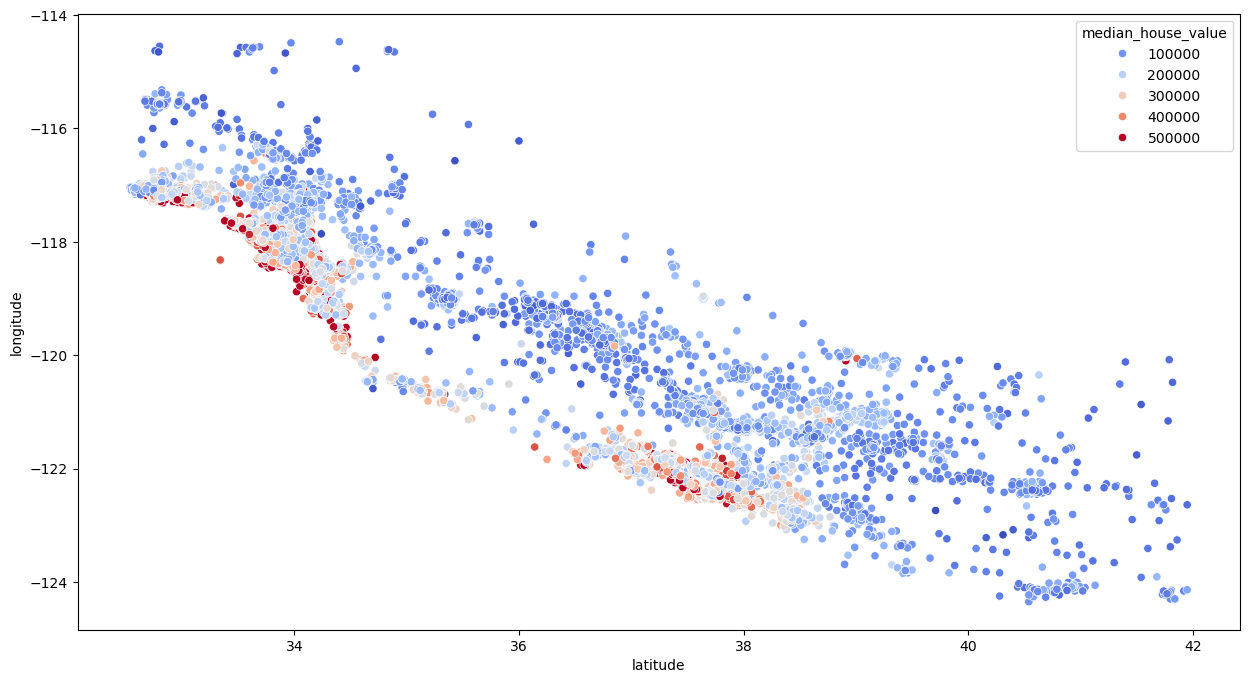

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train,hue='median_house_value',palette='coolwarm')

In [66]:
# We have total_rooms and total_bedrooms, but the better feature would be total_bedrooms_per_room

In [67]:
train['bedroom_ratio']=train['total_bedrooms']/train['total_rooms']

In [69]:
# we also might have a feature of total number of rooms per household
train['household_rooms']=train['total_rooms']/train['households']

<Axes: >

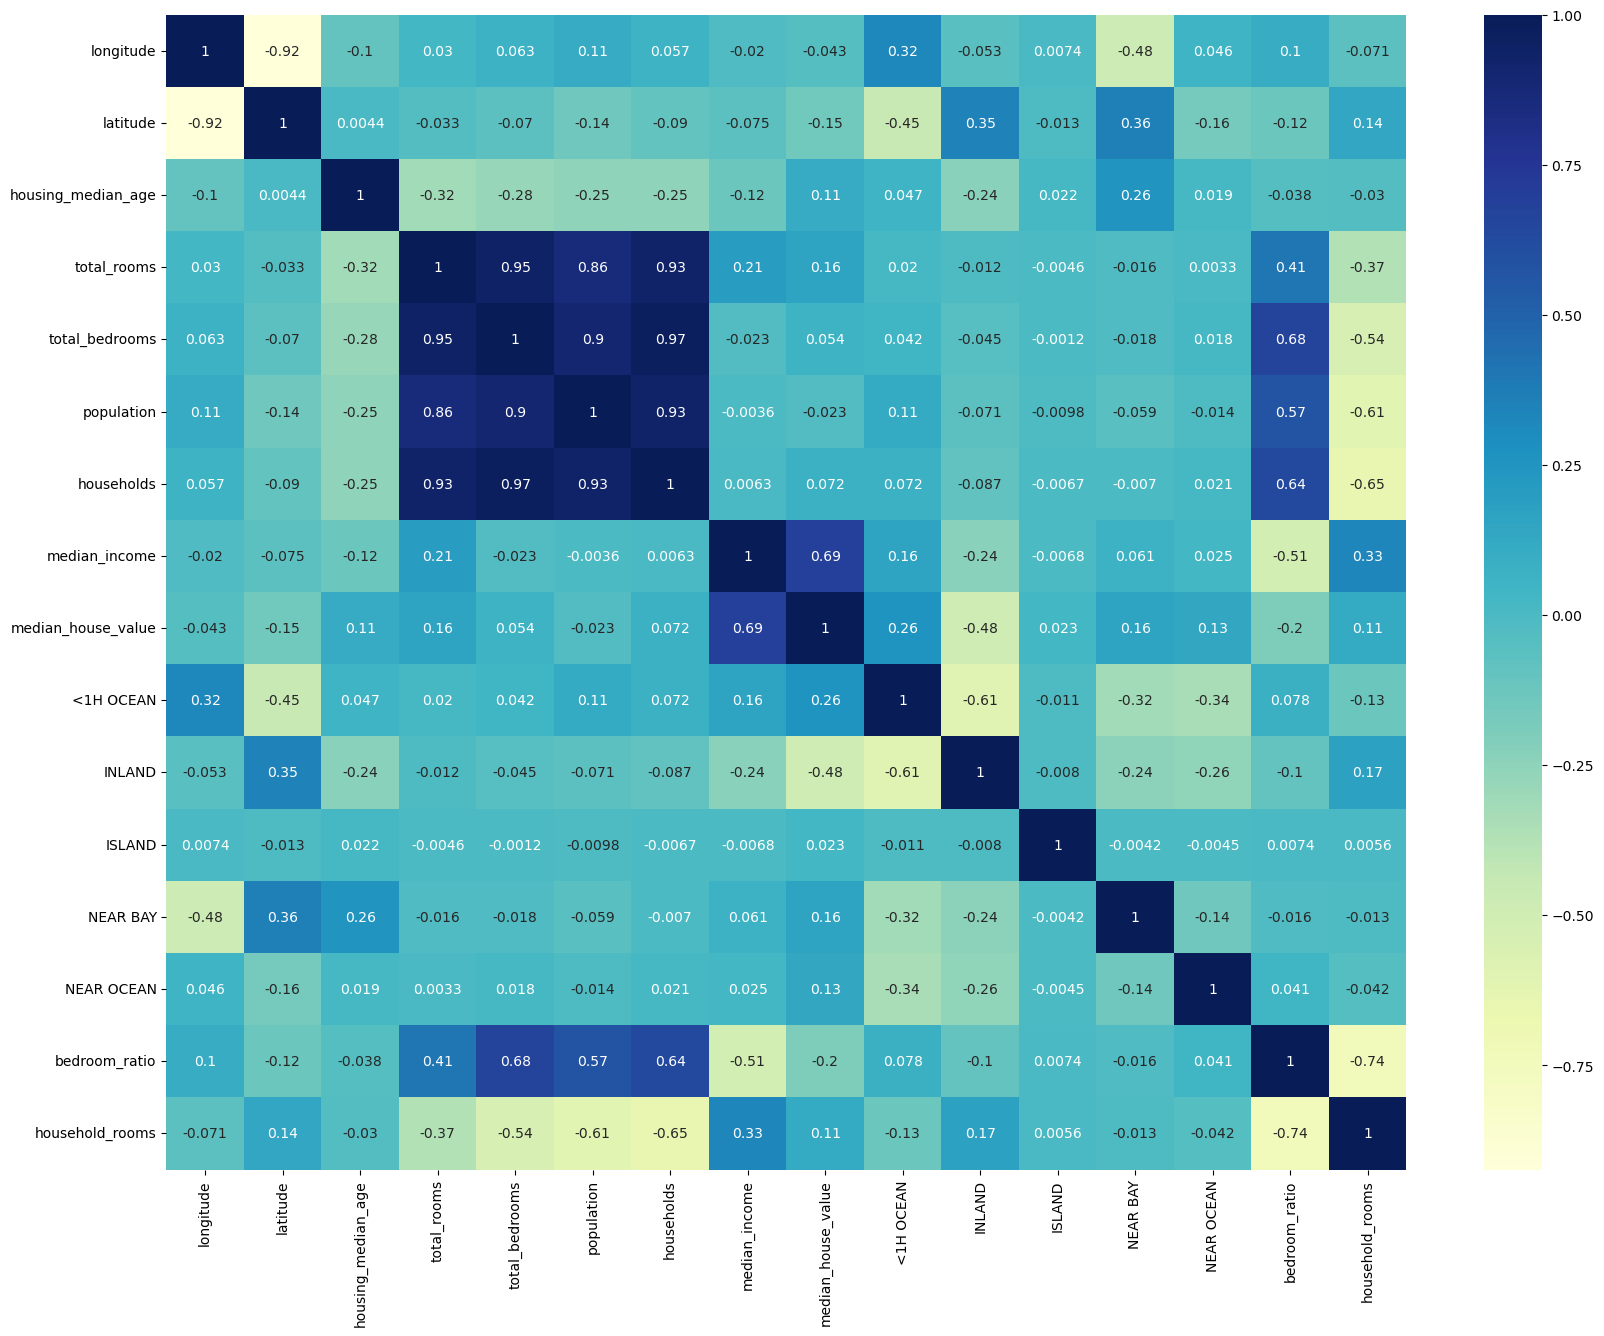

In [70]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg=LinearRegression()
sc=StandardScaler()

In [80]:
X=train.drop(['median_house_value'],axis=1)
y=train['median_house_value']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train_s=sc.fit_transform(X_train)

In [88]:
reg.fit(X_train_s,y_train)

LinearRegression()

In [90]:
X_test_s=sc.fit_transform(X_test)

In [91]:
y_pred=reg.predict(X_test_s)

In [93]:
reg.score(X_test_s,y_test)

0.6855123124036986

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
forest=RandomForestRegressor() #by default, no of trees=100

In [127]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [128]:
forest.score(X_test,y_test)

0.8165588959638432

In [103]:
# We see that the performance has increased

In [107]:
from sklearn.model_selection import GridSearchCV

#for hyperparameter selection

In [118]:
param_grid={
    "n_estimators":[30,50,100], #no of trees in thye forest
    "max_features":[8,12,20],#no of features to consider
}

grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True) #cv=5, means 5-fold cross validation

grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [112]:
forrest=RandomForestRegressor()

In [114]:
best_forest=grid_search.best_estimator_

In [117]:
best_forest.score(X_test,y_test)

0.7985686820506547